In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import spacy
import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.models import load_model

from gensim.models import KeyedVectors

In [2]:
def word_to_index(data): 
    '''
    Input:
        data - numpy array with str sentences 
    Output:
        word_index_arr - numpy array with word indexes
    '''
    word_index_list = []
    for sentence in data:
        line = []
        for word in str(sentence).split():
            if word in word2vec_model.vocab:
                line.append(word2vec_model.vocab[word].index)
            else:
                line.append(199999)
        word_index_list.append(line)
    word_index_arr = np.array(word_index_list)
    return word_index_arr

In [3]:
def save_history(history, filename):
    '''
    Input:
        history - keras history instance
        filename - string filename to save
    Output:
       None
    '''
    np.save('../model_data/' + filename + 'hist.npy', history.history)
    return


In [4]:
def load_history(path):
    '''
    Input:
        path - string path of history file, filename included
    Output:
       history - keras history instance
    '''
    history = np.load(path, allow_pickle='TRUE').item()
    return history

In [5]:
def load_model(path):
    '''
    Input:
        path - string path of model file, filename included
    Output:
       history - keras history instance
    '''
    saved_model = load_model(path)
    return saved_model

In [6]:
def display_loss_plot(history, filename):
    '''
    Input:
        history - keras history instance
        filename - string filename to save
    Output:
       None
    '''
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)
    nb_epochs = len(loss)
  
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 14}
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
                  'verticalalignment':'bottom'} 

    plt.figure(figsize=(20,10))
    plt.xlabel(str(nb_epochs) + ' Epochs', **font)
    plt.ylabel('Loss', **font)
    plt.plot(epochs, loss, 'r', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss', **title_font)
    plt.legend()
    plt.savefig('../rel/figuras/' + filename + 'loss.png')
    plt.show()

In [7]:
def display_acc_plot(history, filename):
    '''
    Input:
        history - keras history instance
        filename - string filename to save
    Output:
       None
    '''
    accuracy = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(accuracy) + 1)
    nb_epochs = len(accuracy)
  
    font = {'family' : 'normal',
            'weight' : 'normal',
            'size'   : 14}
    title_font = {'fontname':'Arial', 'size':'16', 'color':'black', 'weight':'normal',
                  'verticalalignment':'bottom'} 

    plt.figure(figsize=(20,10))
    plt.xlabel(str(nb_epochs) + ' Epochs', **font)
    plt.ylabel('Accuracy', **font)
    plt.plot(epochs, accuracy, 'r', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label='Validation acc')
    plt.title('Training and validation acc', **title_font)
    plt.legend()
    plt.savefig('../rel/figuras/' + filename + 'acc.png')
    plt.show()

In [8]:
sns.set_theme()

In [9]:
# Tamanho máximo de uma sentença
SEQUENCE_MAXLEN = 50

# Carrega os embeddings do word2vec
word2vec_model = KeyedVectors.load_word2vec_format("../data/word2vec_200k.txt")

# Carrega os datasets
train = pd.read_csv('../data/train.csv', sep=';')
val = pd.read_csv('../data/val.csv', sep=';')
test = pd.read_csv('../data/test.csv', sep=';')

In [10]:
x_train = train['review_text'].values
y_train = train['overall_rating'].values
x_train = word_to_index(x_train)
x_train = keras.preprocessing.sequence.pad_sequences(x_train, value=0, maxlen=SEQUENCE_MAXLEN, padding='post', truncating='post')

x_val = val['review_text'].values
y_val = val['overall_rating'].values
x_val = word_to_index(x_val)
x_val = keras.preprocessing.sequence.pad_sequences(x_val, value=0, maxlen=SEQUENCE_MAXLEN, padding='post', truncating='post')

x_test = test['review_text'].values
y_test = test['overall_rating'].values
x_test = word_to_index(x_test)
x_test = keras.preprocessing.sequence.pad_sequences(x_test, value=0, maxlen=SEQUENCE_MAXLEN, padding='post', truncating='post')

In [11]:
print(x_train.shape)
print(x_val.shape)
print(x_test.shape)

(78501, 50)
(12078, 50)
(30193, 50)


In [26]:
#y_train = to_categorical(y_train)
#y_val = to_categorical(y_val)

# Modelo LSTM

In [27]:
def get_lstm_model(dropout_prob=0.0):   
    model = keras.Sequential()
    model.add(layers.Input(shape=(SEQUENCE_MAXLEN, )))
    embedding_layer = word2vec_model.get_keras_embedding()
    embedding_layer.trainable = False
    model.add(embedding_layer)
    model.add(layers.LSTM(64))
    model.add(layers.Dropout(dropout_prob))
    model.add(keras.layers.Dense(5, activation='softmax'))
    model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

<h3>Modelo LSTM 1</h3> 

1 Camada oculta com 64 células

Embedding layer 50x50

0.0 de Dropout

Camada de saída com 5 neurônios e função de ativação Softmax

Otimizador - Adam

Função de loss - Sparse Categorical Crossentropy

Callbacks - Early Stoppping com modo MAX - monitorando acurácia de validação - paciência 10

Model Checkpoint - salva o modelo na época que obteve os melhores resultados, com modo MAX
monitorando acurácia de validação
          
Batch size - 32

Épocas - 100

Modelo LSTM com Dropout 0.0

Epoch 1/100
2454/2454 [==============================] - 63s 26ms/step - loss: 1.1640 - accuracy: 0.5018 - val_loss: 1.0791 - val_accuracy: 0.5367
Epoch 2/100
2454/2454 [==============================] - 57s 23ms/step - loss: 1.0549 - accuracy: 0.5459 - val_loss: 0.9952 - val_accuracy: 0.5670
Epoch 3/100
2454/2454 [==============================] - 56s 23ms/step - loss: 1.0063 - accuracy: 0.5649 - val_loss: 0.9742 - val_accuracy: 0.5771
Epoch 4/100
2454/2454 [==============================] - 66s 27ms/step - loss: 0.9798 - accuracy: 0.5729 - val_loss: 0.9644 - val_accuracy: 0.5742
Epoch 5/100
2454/2454 [==============================] - 81s 33ms/step - loss: 0.9621 - accuracy: 0.5812 - val_loss: 0.9464 - val_accuracy: 0.5885
Epoch 6/100
2454/2454 [==============================] - 59s 24ms/step - loss: 0.9469 - accuracy: 0.5872 - val_loss: 0.9407 - val_accuracy: 0.5823
Epoch 7/100
2454/2454 [==============================] - 56s 23ms/step - loss: 0.9336 - a

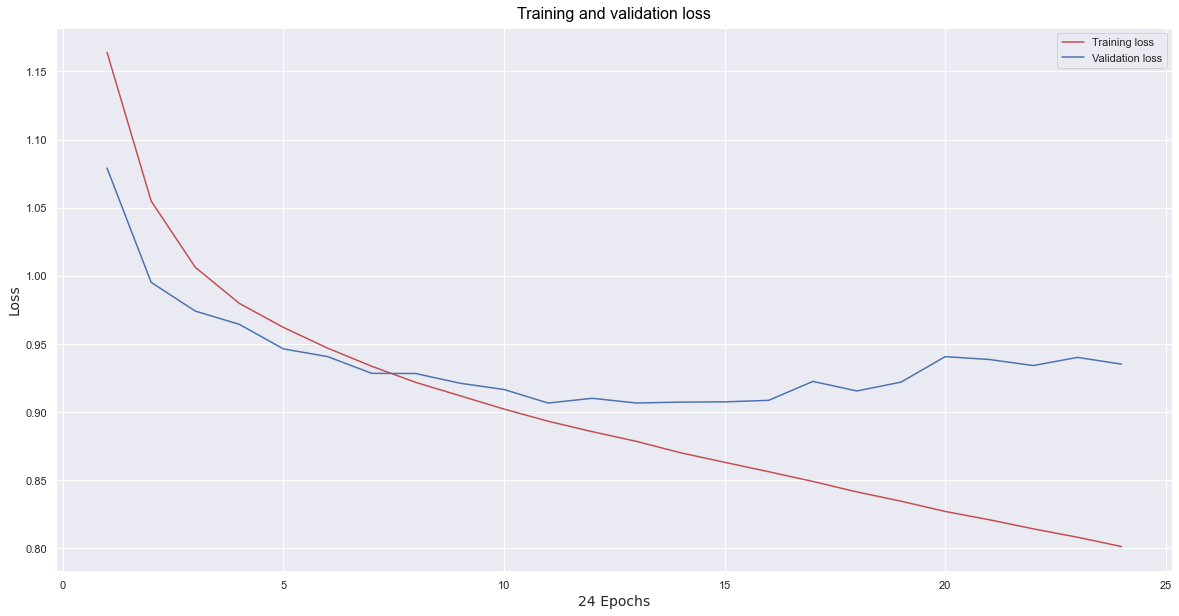

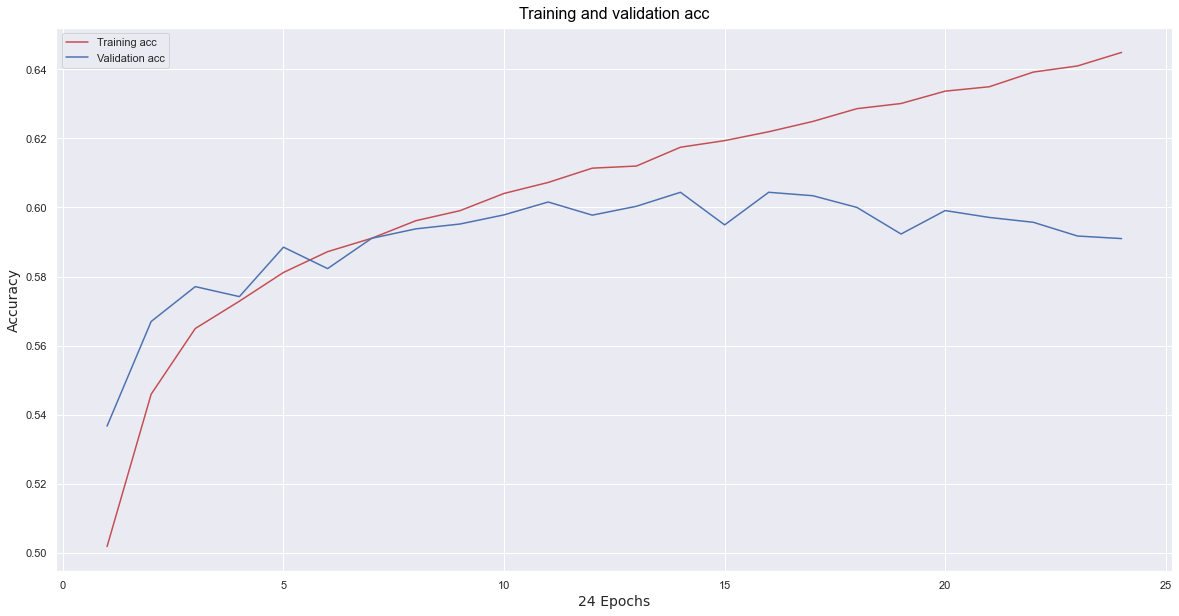

In [28]:
print("Modelo LSTM com Dropout 0.0\n")
name = 'm1_lstm_drop0.0'
model = get_lstm_model(dropout_prob=0.0)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('../model_data/' + name + 'best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[es, mc])
save_history(history, name)
model.evaluate(x_test, y_test)
display_loss_plot(history, name)
display_acc_plot(history, name)

In [29]:
print()
print('Acurácia e loss conjunto de testes')
model.evaluate(x_test, y_test)

print()
print('Acurácia e loss conjunto de testes - modelo melhor desempenho')
best_model_lstm = model.load_weights('../model_data/' + name + 'best_model.h5')
model.evaluate(x_test, y_test)


Acurácia e loss conjunto de testes
944/944 [==============================] - 9s 10ms/step - loss: 0.9566 - accuracy: 0.5884

Acurácia e loss conjunto de testes - modelo melhor desempenho
944/944 [==============================] - 8s 9ms/step - loss: 0.9270 - accuracy: 0.5968


[0.9270115494728088, 0.5967608094215393]

<h3>Modelo LSTM 2</h3> 

1 Camada oculta com 64 células

Embedding layer 50x50

0.25 de Dropout

Camada de saída com 5 neurônios e função de ativação Softmax

Otimizador - Adam

Função de loss - Sparse Categorical Crossentropy

Callbacks - Early Stoppping com modo MAX - monitorando acurácia de validação - paciência 10

Model Checkpoint - salva o modelo na época que obteve os melhores resultados, com modo MAX
monitorando acurácia de validação
          
Batch size - 32

Épocas - 100

Modelo LSTM com Dropout 0.25

Epoch 1/100
2454/2454 [==============================] - 57s 23ms/step - loss: 1.1708 - accuracy: 0.4982 - val_loss: 1.0939 - val_accuracy: 0.5209
Epoch 2/100
2454/2454 [==============================] - 58s 24ms/step - loss: 1.0783 - accuracy: 0.5352 - val_loss: 1.0388 - val_accuracy: 0.5554
Epoch 3/100
2454/2454 [==============================] - 58s 24ms/step - loss: 1.0216 - accuracy: 0.5615 - val_loss: 1.0012 - val_accuracy: 0.5656
Epoch 4/100
2454/2454 [==============================] - 64s 26ms/step - loss: 0.9919 - accuracy: 0.5728 - val_loss: 0.9717 - val_accuracy: 0.5778
Epoch 5/100
2454/2454 [==============================] - 80s 32ms/step - loss: 0.9699 - accuracy: 0.5795 - val_loss: 0.9480 - val_accuracy: 0.5856
Epoch 6/100
2454/2454 [==============================] - 74s 30ms/step - loss: 0.9539 - accuracy: 0.5840 - val_loss: 0.9299 - val_accuracy: 0.5903
Epoch 7/100
2454/2454 [==============================] - 61s 25ms/step - loss: 0.9434 - 

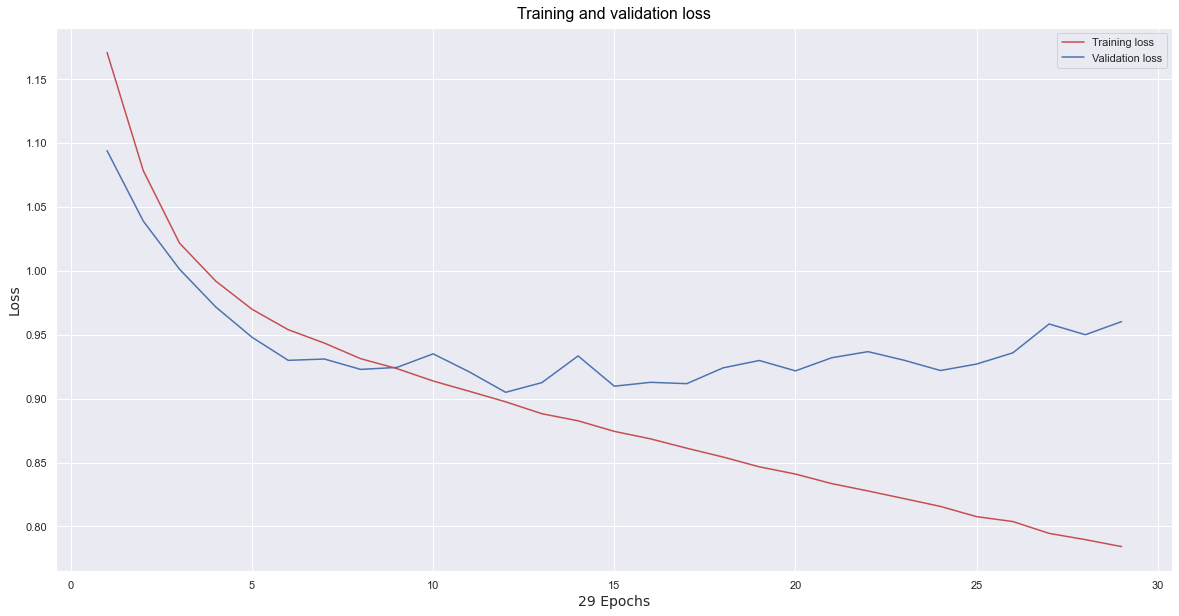

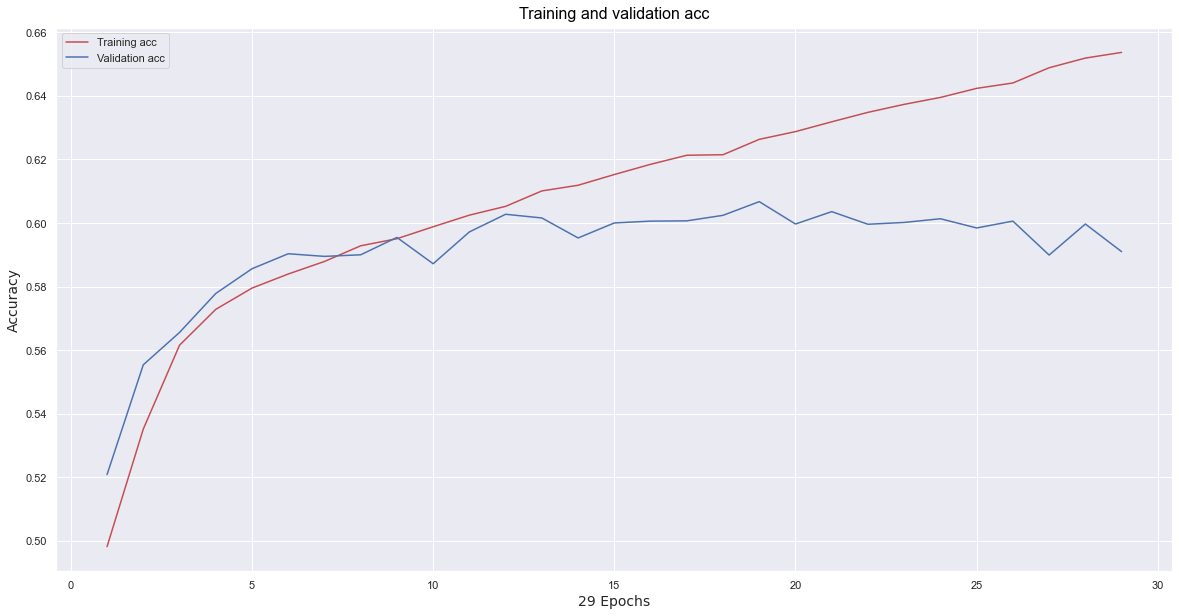

In [30]:
print("Modelo LSTM com Dropout 0.25\n")
name = 'm2_lstm_drop0.25'
model = get_lstm_model(dropout_prob=0.25)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('../model_data/' + name + 'best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[es, mc])
save_history(history, name)
model.evaluate(x_test, y_test)
display_loss_plot(history, name)
display_acc_plot(history, name)

In [17]:
print()
print('Acurácia e loss conjunto de testes')
model.evaluate(x_test, y_test)

print()
print('Acurácia e loss conjunto de testes - modelo melhor desempenho')
best_model_lstm = model.load_weights('../model_data/' + name + 'best_model.h5')
model.evaluate(x_test, y_test)


Acurácia e loss conjunto de testes
944/944 [==============================] - 9s 9ms/step - loss: 0.9841 - accuracy: 0.5895

Acurácia e loss conjunto de testes - modelo melhor desempenho
944/944 [==============================] - 8s 9ms/step - loss: 0.9298 - accuracy: 0.5930


[0.9297500252723694, 0.5929851531982422]

<h3>Modelo LSTM 3</h3> 

1 Camada oculta com 64 células

Embedding layer 50x50

0.5 de Dropout

Camada de saída com 5 neurônios e função de ativação Softmax

Otimizador - Adam

Função de loss - Sparse Categorical Crossentropy

Callbacks - Early Stoppping com modo MAX - monitorando acurácia de validação - paciência 10

Model Checkpoint - salva o modelo na época que obteve os melhores resultados, com modo MAX
monitorando acurácia de validação
          
Batch size - 32

Épocas - 100

Modelo LSTM com Dropout 0.5

Epoch 1/100
2454/2454 [==============================] - 66s 27ms/step - loss: 1.1803 - accuracy: 0.4971 - val_loss: 1.0992 - val_accuracy: 0.5204
Epoch 2/100
2454/2454 [==============================] - 70s 28ms/step - loss: 1.0823 - accuracy: 0.5362 - val_loss: 1.0101 - val_accuracy: 0.5659
Epoch 3/100
2454/2454 [==============================] - 65s 26ms/step - loss: 1.0307 - accuracy: 0.5593 - val_loss: 1.0105 - val_accuracy: 0.5731
Epoch 4/100
2454/2454 [==============================] - 68s 28ms/step - loss: 0.9995 - accuracy: 0.5704 - val_loss: 0.9542 - val_accuracy: 0.5821
Epoch 5/100
2454/2454 [==============================] - 70s 29ms/step - loss: 0.9774 - accuracy: 0.5791 - val_loss: 0.9566 - val_accuracy: 0.5771
Epoch 6/100
2454/2454 [==============================] - 71s 29ms/step - loss: 0.9648 - accuracy: 0.5824 - val_loss: 0.9396 - val_accuracy: 0.5849
Epoch 7/100
2454/2454 [==============================] - 69s 28ms/step - loss: 0.9515 - a

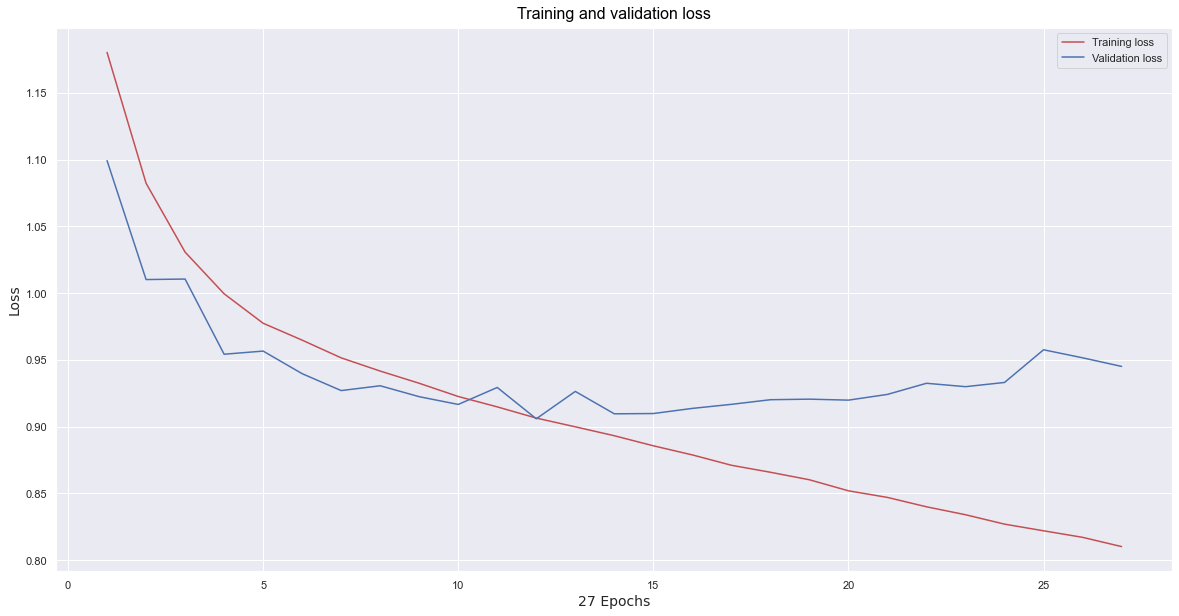

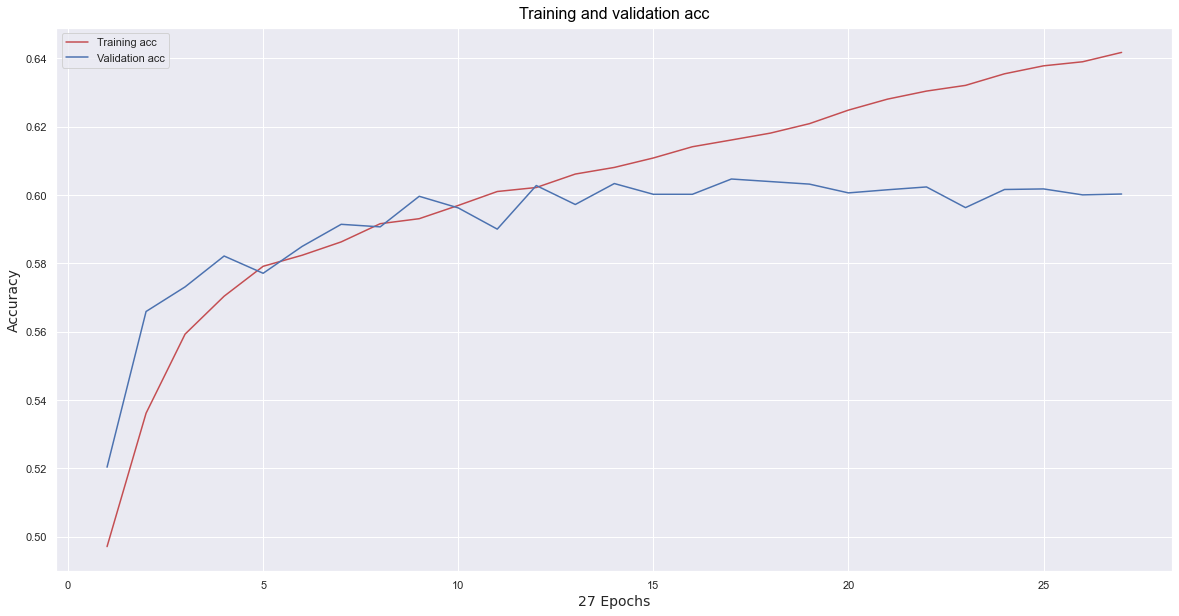

In [32]:
print("Modelo LSTM com Dropout 0.5\n")
name = 'm3_lstm_drop0.5'
model = get_lstm_model(dropout_prob=0.5)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('../model_data/' + name + 'best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[es, mc])
save_history(history, name)
model.evaluate(x_test, y_test)
display_loss_plot(history, name)
display_acc_plot(history, name)

In [31]:
print()
print('Acurácia e loss conjunto de testes')
model.evaluate(x_test, y_test)

print()
print('Acurácia e loss conjunto de testes - modelo melhor desempenho')
best_model_lstm = model.load_weights('../model_data/' + name + 'best_model.h5')
model.evaluate(x_test, y_test)


Acurácia e loss conjunto de testes
944/944 [==============================] - 7s 8ms/step - loss: 1.0022 - accuracy: 0.5793

Acurácia e loss conjunto de testes - modelo melhor desempenho
944/944 [==============================] - 7s 7ms/step - loss: 0.9608 - accuracy: 0.5933


[0.9608032703399658, 0.5932832360267639]

# Modelo Bidirecional

In [13]:
def get_bidirectional_model(dropout_prob=0.0):   
    model = keras.Sequential()
    model.add(layers.Input(shape=(SEQUENCE_MAXLEN, )))
    embedding_layer = word2vec_model.get_keras_embedding()
    embedding_layer.trainable = False
    forward_layer = keras.layers.LSTM(64)
    backward_layer = keras.layers.LSTM(64, go_backwards=True)
    model.add(embedding_layer)
    model.add(keras.layers.Bidirectional(forward_layer, backward_layer=backward_layer))
    model.add(layers.Dropout(dropout_prob))
    model.add(keras.layers.Dense(5, activation='softmax'))
    model.compile("adam", "sparse_categorical_crossentropy", metrics=["accuracy"])
    return model

<h3>Modelo Bidirecional 1</h3> 

1 camada bidirecional com duas LSTM's com 64 células cada uma

Embedding layer 50x50

0.0 de Dropout

Camada de saída com 5 neurônios e função de ativação Softmax

Otimizador - Adam

Função de loss - Sparse Categorical Crossentropy

Callbacks - Early Stoppping com modo MAX - monitorando acurácia de validação - paciência 10

Model Checkpoint - salva o modelo na época que obteve os melhores resultados, com modo MAX
monitorando acurácia de validação
          
Batch size - 32

Épocas - 100

Modelo Bidirecional com Dropout 0.0

Epoch 1/100
2454/2454 [==============================] - 71s 29ms/step - loss: 1.1208 - accuracy: 0.5198 - val_loss: 1.0204 - val_accuracy: 0.5617
Epoch 2/100
2454/2454 [==============================] - 67s 27ms/step - loss: 1.0131 - accuracy: 0.5639 - val_loss: 0.9737 - val_accuracy: 0.5791
Epoch 3/100
2454/2454 [==============================] - 70s 29ms/step - loss: 0.9735 - accuracy: 0.5772 - val_loss: 0.9481 - val_accuracy: 0.5934
Epoch 4/100
2454/2454 [==============================] - 59s 24ms/step - loss: 0.9465 - accuracy: 0.5880 - val_loss: 0.9633 - val_accuracy: 0.5825
Epoch 5/100
2454/2454 [==============================] - 59s 24ms/step - loss: 0.9252 - accuracy: 0.5957 - val_loss: 0.9205 - val_accuracy: 0.6014
Epoch 6/100
2454/2454 [==============================] - 59s 24ms/step - loss: 0.9092 - accuracy: 0.6015 - val_loss: 0.9197 - val_accuracy: 0.5970
Epoch 7/100
2454/2454 [==============================] - 58s 24ms/step - loss: 0.

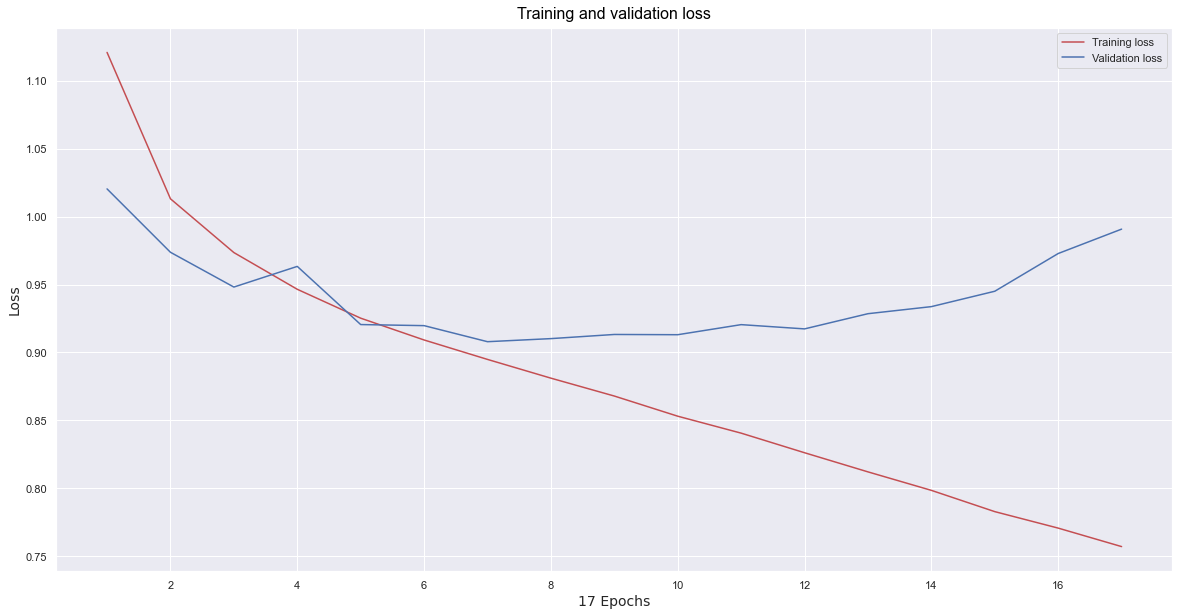

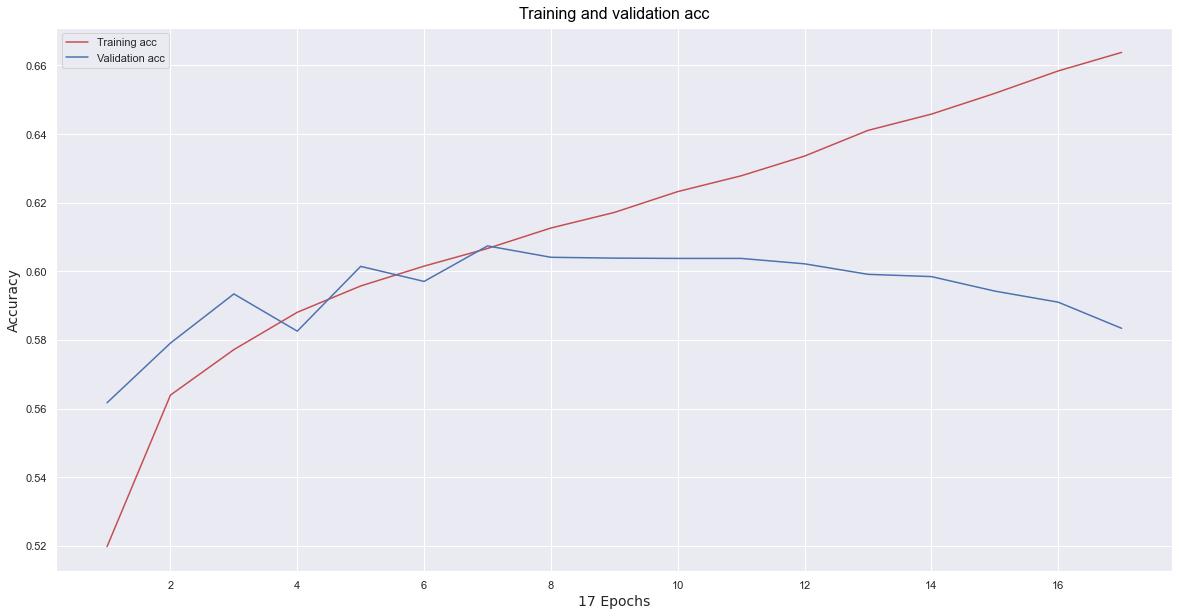

In [46]:
print("Modelo Bidirecional com Dropout 0.0\n")
name = 'm1_bidirectional_drop0.0'
model = get_bidirectional_model(dropout_prob=0.0)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('../model_data/' + name + 'best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[es, mc])
save_history(history, name)
model.evaluate(x_test, y_test)
display_loss_plot(history, name)
display_acc_plot(history, name)

In [47]:
print()
print('Acurácia e loss conjunto de testes')
model.evaluate(x_test, y_test)

print()
print('Acurácia e loss conjunto de testes - modelo melhor desempenho')
best_model_lstm = model.load_weights('../model_data/' + name + 'best_model.h5')
model.evaluate(x_test, y_test)


Acurácia e loss conjunto de testes
944/944 [==============================] - 6s 7ms/step - loss: 1.0162 - accuracy: 0.5743

Acurácia e loss conjunto de testes - modelo melhor desempenho
944/944 [==============================] - 6s 7ms/step - loss: 0.9239 - accuracy: 0.5965


[0.9238772392272949, 0.5964627265930176]

<h3>Modelo Bidirecional 2</h3> 

1 camada bidirecional com duas LSTM's com 64 células cada uma

Embedding layer 50x50

0.25 de Dropout

Camada de saída com 5 neurônios e função de ativação Softmax

Otimizador - Adam

Função de loss - Sparse Categorical Crossentropy

Callbacks - Early Stoppping com modo MAX - monitorando acurácia de validação - paciência 10

Model Checkpoint - salva o modelo na época que obteve os melhores resultados, com modo MAX
monitorando acurácia de validação
          
Batch size - 32

Épocas - 100

Modelo Bidirecional com Dropout 0.25

Epoch 1/100
2454/2454 [==============================] - 62s 25ms/step - loss: 1.1305 - accuracy: 0.5173 - val_loss: 1.0422 - val_accuracy: 0.5517
Epoch 2/100
2454/2454 [==============================] - 60s 24ms/step - loss: 1.0225 - accuracy: 0.5601 - val_loss: 0.9974 - val_accuracy: 0.5737
Epoch 3/100
2454/2454 [==============================] - 63s 26ms/step - loss: 0.9826 - accuracy: 0.5743 - val_loss: 0.9497 - val_accuracy: 0.5843
Epoch 4/100
2454/2454 [==============================] - 62s 25ms/step - loss: 0.9580 - accuracy: 0.5825 - val_loss: 0.9445 - val_accuracy: 0.5919
Epoch 5/100
2454/2454 [==============================] - 60s 25ms/step - loss: 0.9390 - accuracy: 0.5899 - val_loss: 0.9265 - val_accuracy: 0.5939
Epoch 6/100
2454/2454 [==============================] - 59s 24ms/step - loss: 0.9236 - accuracy: 0.5963 - val_loss: 0.9157 - val_accuracy: 0.5988
Epoch 7/100
2454/2454 [==============================] - 63s 26ms/step - loss: 0

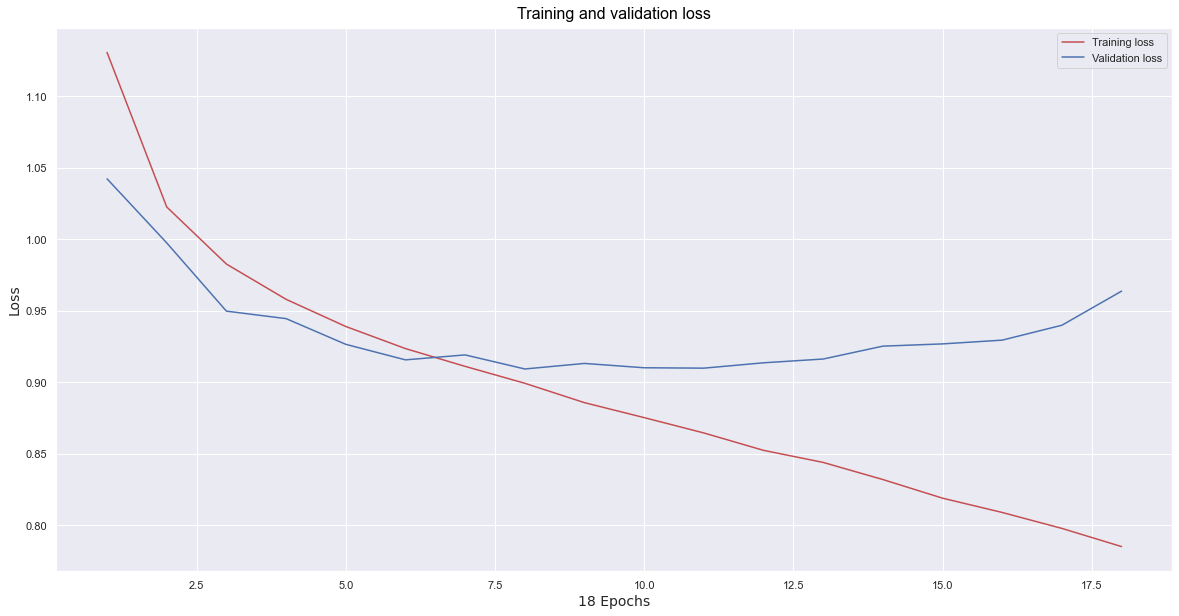

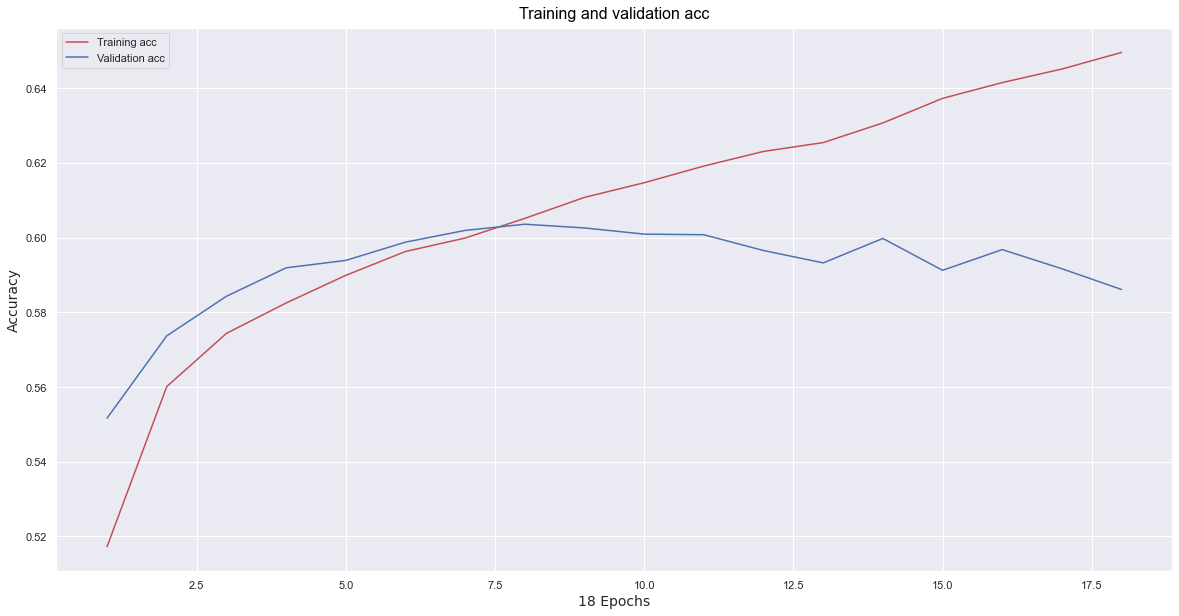

In [48]:
print("Modelo Bidirecional com Dropout 0.25\n")
name = 'm2_bidirectional_drop0.25'
model = get_bidirectional_model(dropout_prob=0.25)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('../model_data/' + name + 'best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[es, mc])
save_history(history, name)
model.evaluate(x_test, y_test)
display_loss_plot(history, name)
display_acc_plot(history, name)

In [49]:
print()
print('Acurácia e loss conjunto de testes')
model.evaluate(x_test, y_test)

print()
print('Acurácia e loss conjunto de testes - modelo melhor desempenho')
best_model_lstm = model.load_weights('../model_data/' + name + 'best_model.h5')
model.evaluate(x_test, y_test)


Acurácia e loss conjunto de testes
944/944 [==============================] - 7s 8ms/step - loss: 0.9879 - accuracy: 0.5799

Acurácia e loss conjunto de testes - modelo melhor desempenho
944/944 [==============================] - 7s 7ms/step - loss: 0.9292 - accuracy: 0.5960


[0.9292348027229309, 0.5959659814834595]

<h3>Modelo Bidirecional 3</h3> 

1 camada bidirecional com duas LSTM's com 64 células cada uma

Embedding layer 50x50

0.5 de Dropout

Camada de saída com 5 neurônios e função de ativação Softmax

Otimizador - Adam

Função de loss - Sparse Categorical Crossentropy

Callbacks - Early Stoppping com modo MAX - monitorando acurácia de validação - paciência 10

Model Checkpoint - salva o modelo na época que obteve os melhores resultados, com modo MAX
monitorando acurácia de validação
          
Batch size - 32

Épocas - 100

Modelo Bidirecional com Dropout 0.5

Epoch 1/100
2454/2454 [==============================] - 78s 32ms/step - loss: 1.1360 - accuracy: 0.5156 - val_loss: 1.0428 - val_accuracy: 0.5563
Epoch 2/100
2454/2454 [==============================] - 82s 33ms/step - loss: 1.0370 - accuracy: 0.5541 - val_loss: 0.9781 - val_accuracy: 0.5785
Epoch 3/100
2454/2454 [==============================] - 107s 44ms/step - loss: 0.9949 - accuracy: 0.5701 - val_loss: 0.9519 - val_accuracy: 0.5840
Epoch 4/100
2454/2454 [==============================] - 92s 37ms/step - loss: 0.9698 - accuracy: 0.5783 - val_loss: 0.9455 - val_accuracy: 0.5864
Epoch 5/100
2454/2454 [==============================] - 97s 40ms/step - loss: 0.9536 - accuracy: 0.5847 - val_loss: 0.9360 - val_accuracy: 0.5922
Epoch 6/100
2454/2454 [==============================] - 108s 44ms/step - loss: 0.9412 - accuracy: 0.5891 - val_loss: 0.9223 - val_accuracy: 0.5994
Epoch 7/100
2454/2454 [==============================] - 66s 27ms/step - loss: 

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


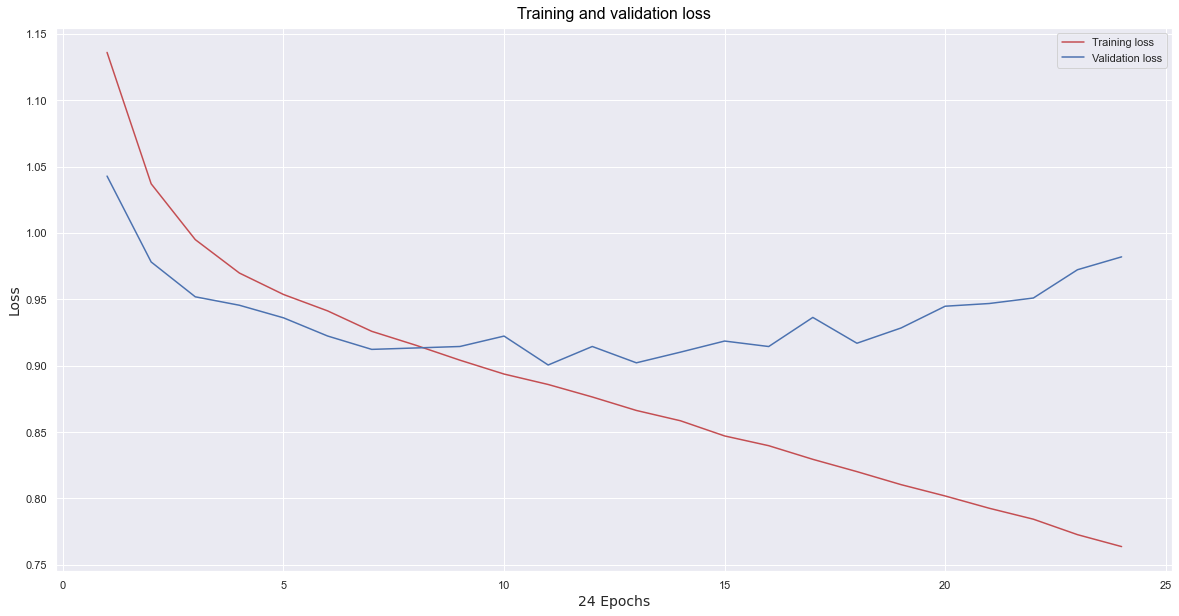

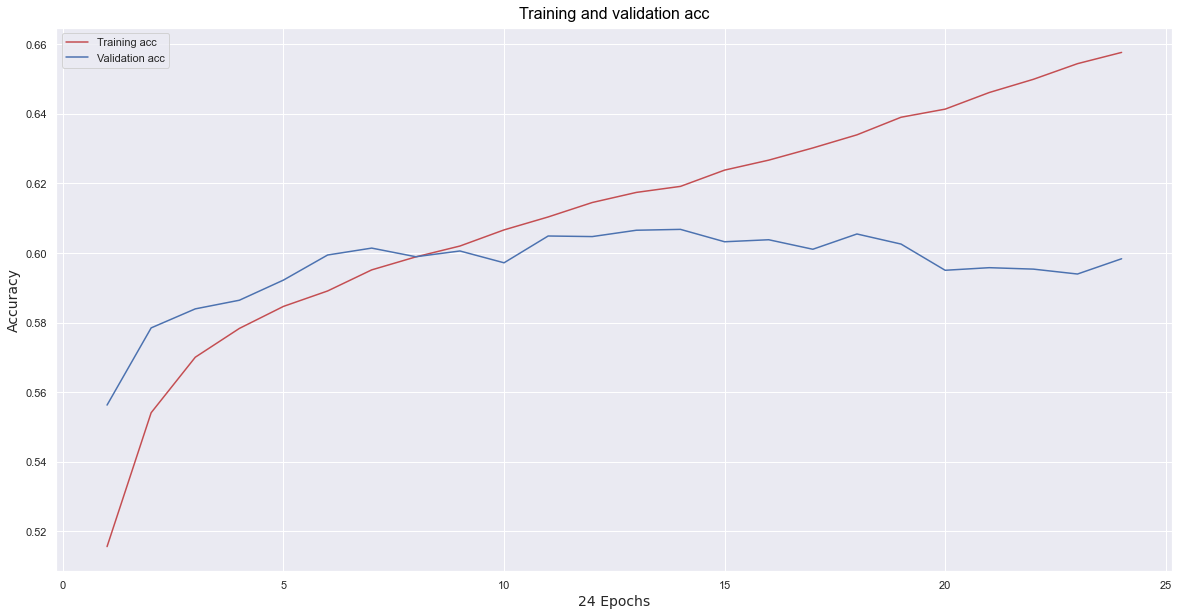

In [14]:
print("Modelo Bidirecional com Dropout 0.5\n")
name = 'm3_bidirectional_drop0.5'
model = get_bidirectional_model(dropout_prob=0.5)
es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience=10)
mc = ModelCheckpoint('../model_data/' + name + 'best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True)
history = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_data=(x_val, y_val), callbacks=[es, mc])
save_history(history, name)
model.evaluate(x_test, y_test)
display_loss_plot(history, name)
display_acc_plot(history, name)

In [15]:
print()
print('Acurácia e loss conjunto de testes')
model.evaluate(x_test, y_test)

print()
print('Acurácia e loss conjunto de testes - modelo melhor desempenho')
best_model_lstm = model.load_weights('../model_data/' + name + 'best_model.h5')
model.evaluate(x_test, y_test)


Acurácia e loss conjunto de testes
944/944 [==============================] - 9s 9ms/step - loss: 1.0234 - accuracy: 0.5865

Acurácia e loss conjunto de testes - modelo melhor desempenho
944/944 [==============================] - 9s 10ms/step - loss: 0.9368 - accuracy: 0.5952


[0.9368264675140381, 0.5952373147010803]